In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [4]:
df_yearly = pd.read_csv("./annual_deaths_by_clinic.csv")
df_monthly = pd.read_csv("./monthly_deaths.csv")
display(df_yearly)
display(df_monthly)

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2
...,...,...,...
93,1848-11-01,310,9
94,1848-12-01,373,5
95,1849-01-01,403,9
96,1849-02-01,389,12


In [5]:
print(df_yearly.shape)
print(df_yearly.columns)
print(df_yearly.year.describe())
print(df_yearly.duplicated().values.any())
print(df_yearly.isna().values.any())

(12, 4)
Index(['year', 'births', 'deaths', 'clinic'], dtype='object')
count      12.000000
mean     1843.500000
std         1.783765
min      1841.000000
25%      1842.000000
50%      1843.500000
75%      1845.000000
max      1846.000000
Name: year, dtype: float64
False
False


In [6]:
print(df_monthly.shape)
print(df_monthly.columns)
print(df_monthly.births.describe())
print(df_monthly.deaths.describe())
print(df_monthly.duplicated().values.any())
print(df_monthly.isna().values.any())

(98, 3)
Index(['date', 'births', 'deaths'], dtype='object')
count     98.000000
mean     267.000000
std       41.769372
min      190.000000
25%      242.500000
50%      264.000000
75%      292.750000
max      406.000000
Name: births, dtype: float64
count    98.000000
mean     22.469388
std      18.141031
min       0.000000
25%       8.000000
50%      16.500000
75%      36.750000
max      75.000000
Name: deaths, dtype: float64
False
False


In [7]:
b = df_yearly.births.sum()
d = df_yearly.deaths.sum()
print(f'Percentage of Deaths : {d/b*100:.3}%')

Percentage of Deaths : 7.08%


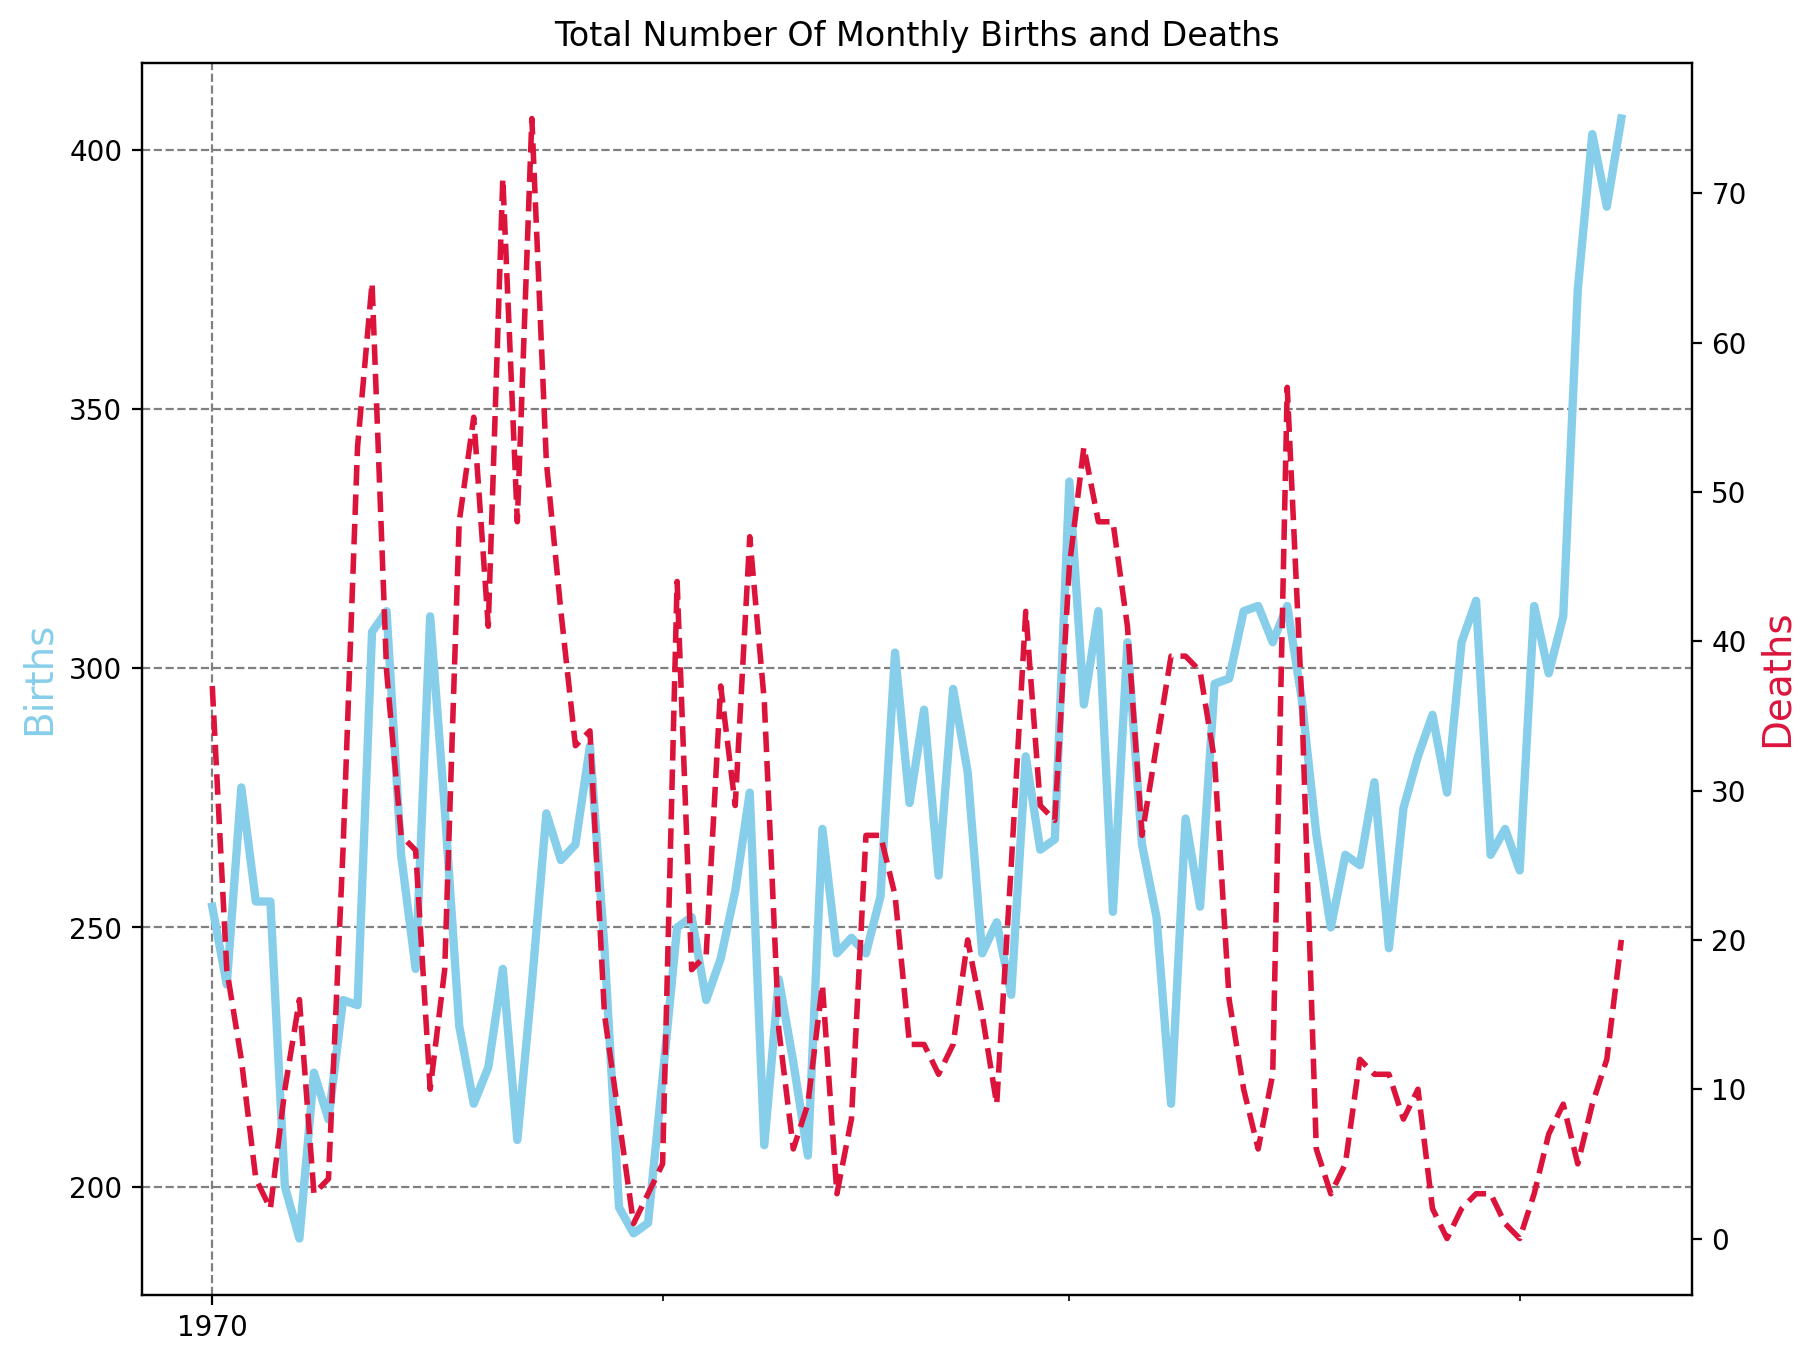

In [16]:
plt.figure(figsize=(10,8),dpi=200)
plt.title("Total Number Of Monthly Births and Deaths")

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.grid(color='grey', linestyle='--')

ax1.set_ylabel("Births",color="skyblue", fontsize=14)
ax2.set_ylabel("Deaths",color="crimson", fontsize=14)

years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.plot(df_monthly.date, df_monthly.births, color="skyblue", linewidth=3)
ax2.plot(df_monthly.date, df_monthly.deaths, color="crimson", linewidth=2, linestyle="--")

In [19]:
line = px.line(df_yearly, x='year', y='births', color="clinic", title="Total Yearly Births By Clinic")
line.show()

In [20]:
line = px.line(df_yearly, 
               x='year', 
               y='deaths',
               color='clinic',
               title='Total Yearly Deaths by Clinic')
 
line.show()